In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from spectral_cube import SpectralCube
import astropy.units as u
from astropy.utils import data
from astropy.io import fits
import  aplpy

In [3]:
OAr = np.zeros((21,36))
OAb = np.zeros((21,36))
X_OAr = np.zeros((21,36))
X_OAb = np.zeros((21,36))


A  = np.zeros((21,2))
Mu = np.zeros((21,2))
Sig= np.zeros((21,2))
C  = np.zeros((21,2))
Mu_err = np.zeros((21,2))
Sig_err = np.zeros((21,2))

# Serpens_13

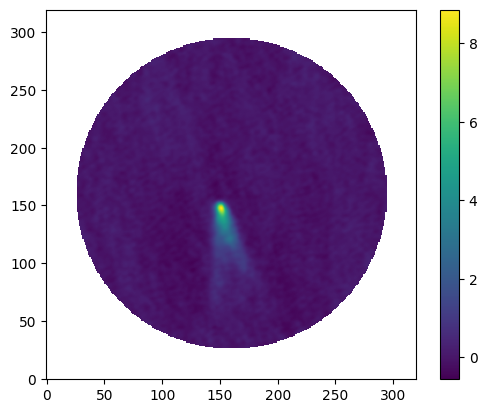

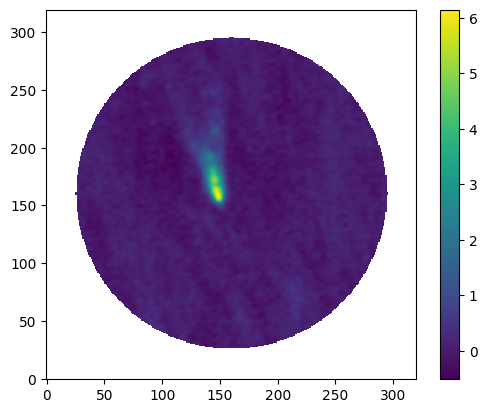

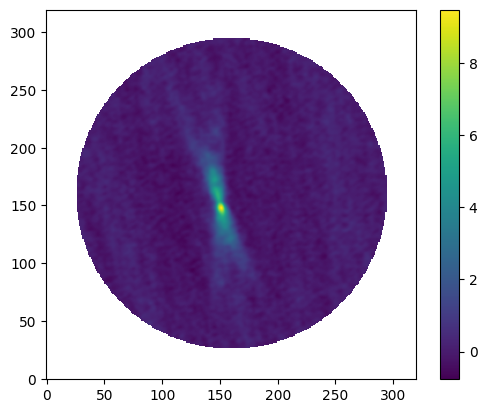

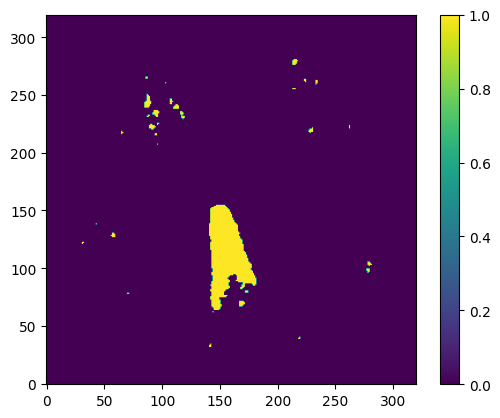

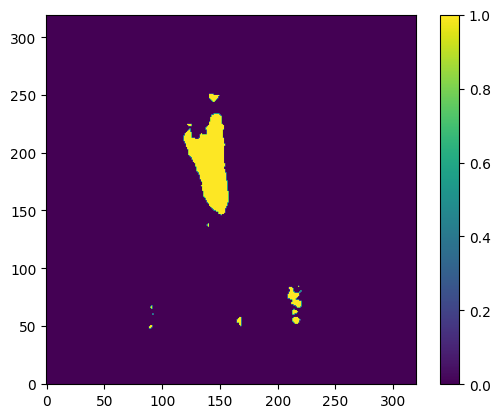

In [4]:
image_file_b = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Serpens/moments/Ser-emb-01_12CO_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Serpens/moments/Ser-emb-01_12CO_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.30,1.0,0.0 )
maskr = np.where(image_datar > 0.35,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

In [5]:
image_header = fits.getheader(image_file_r, ext=0)
#image_header#['CRPIX1']

print(image_header['BUNIT'])

beam-1 Jy km s-1


In [6]:
#import skycoord, units, wcs, fits, from astropy
#from fits header create a wcs object
#using wcs object and ra dec inputs create a skycoord object
# wcsobj.worldttopix() convert the skycoord object to pixel x and y


from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename


f = fits.open(image_file_b)
image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

sky = SkyCoord('18 29 09.09	0 31 30.86', unit=(u.hourangle, u.deg))
x_source, y_source = w.world_to_pixel(sky)

print(x_source, y_source) 

150.35810344298014 151.86428373259224


(320, 320)


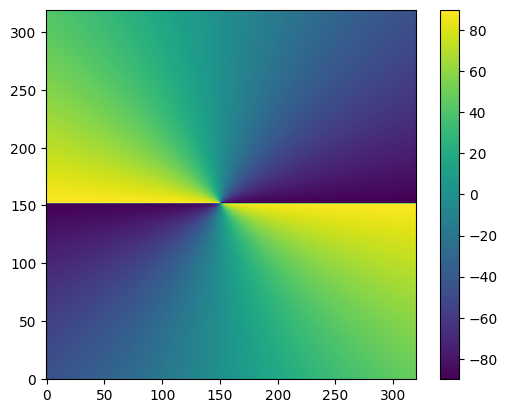

In [7]:
#print(image_header['CRPIX1'])
#print(image_header['CRPIX2'])

PA_grid = np.full((image_header['NAXIS1'],image_header['NAXIS2']),0.0)
print(PA_grid.shape)
 
for i in range(PA_grid.shape[0]):
    for j in range(PA_grid.shape[1]):
        x = i-y_source
        y = j-x_source
        if x ==0:
            #pass
            PA_grid[i][j] = -np.arctan(np.inf)/np.pi*180
        else:
            PA_grid[i][j] = -np.arctan(y/x)/np.pi*180
        
plt.imshow(PA_grid,origin='lower')
plt.colorbar()
plt.show()

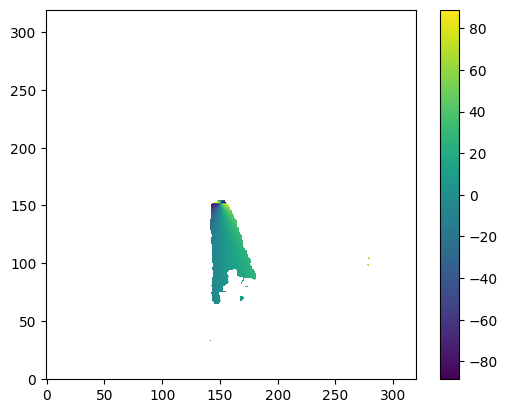

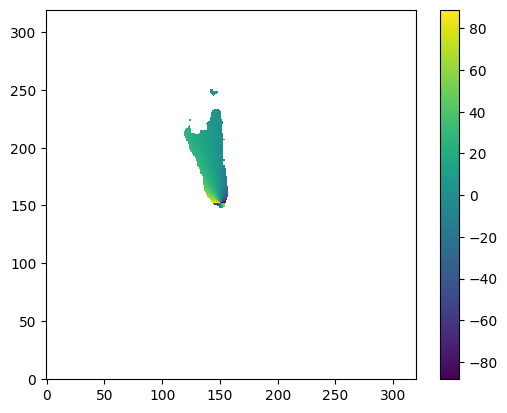

In [8]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
B[200:,:] =np.nan
B[:,:100] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
R[:100,:]=np.nan
plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

In [9]:
#print(len(binrange))

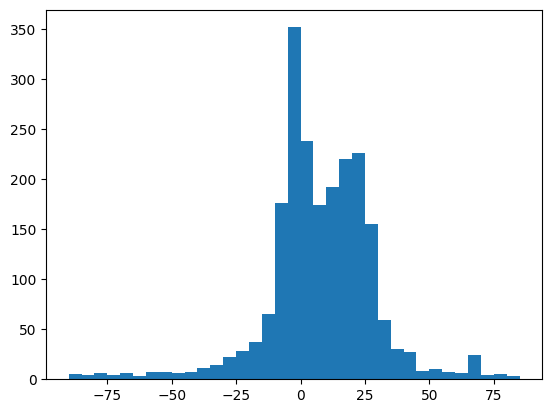

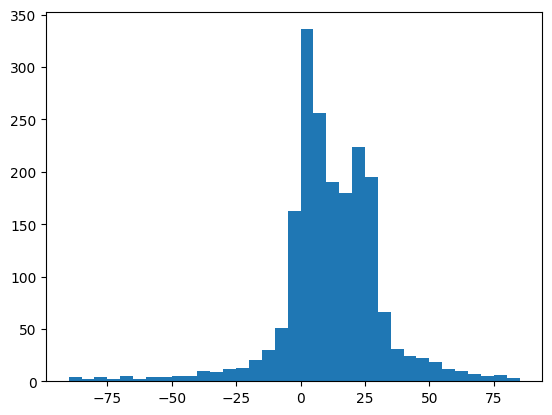

[  5.   4.   6.   4.   6.   3.   7.   7.   6.   7.  11.  14.  22.  28.
  37.  65. 176. 352. 238. 174. 192. 220. 226. 155.  59.  30.  27.   8.
  10.   7.   6.  24.   4.   5.   3.]
[-90. -85. -80. -75. -70. -65. -60. -55. -50. -45. -40. -35. -30. -25.
 -20. -15. -10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.
  50.  55.  60.  65.  70.  75.  80.  85.]
35 36
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]


In [10]:
binrange = np.arange(-90,90,5)
outputb = plt.hist(B.flatten(),bins=binrange)

plt.show()


outputr = plt.hist(R.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)
PA2=np.arange(-90,260,5)#(astropy.coordinates) #— Astropy v5.3.3

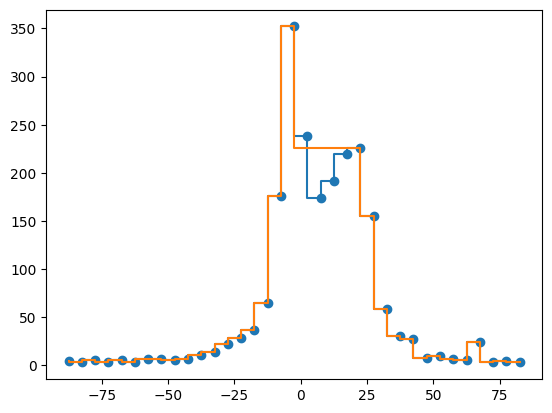

In [11]:
#BLUE

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0],ds='steps')
plt.scatter(PA,outputb[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-2.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subset = np.concatenate((PA[:18], PA[-13:]))
y_subset = np.concatenate((outputb[0][:18], outputb[0][-13:]))
plt.plot(x_subset,y_subset, ds='steps')

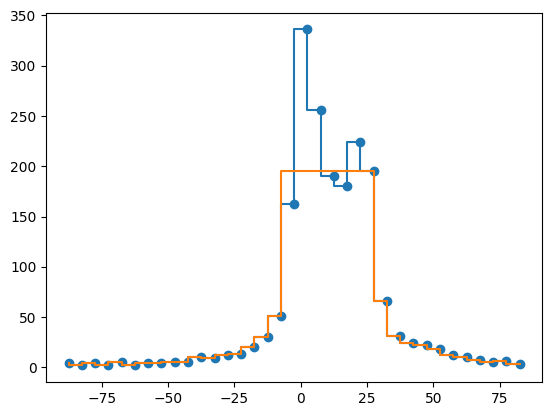

In [12]:
#RED

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputr[0],ds='steps')
plt.scatter(PA,outputr[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-2.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subsetr = np.concatenate((PA[:17], PA[-12:]))
y_subsetr = np.concatenate((outputr[0][:17], outputr[0][-12:]))
plt.plot(x_subsetr,y_subsetr, ds='steps')

Std error [0.20358268 0.32551423]


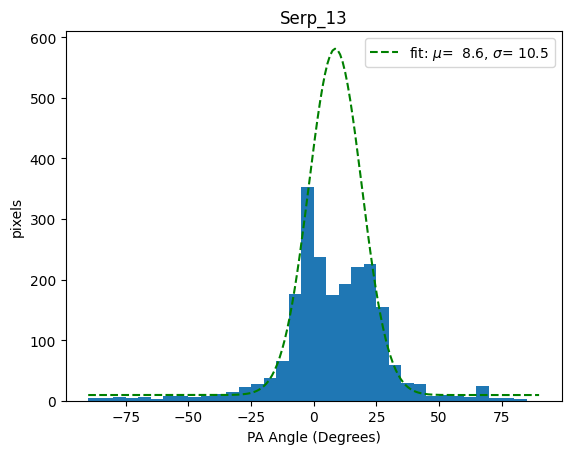

Std error [0.35026298 0.34973841]


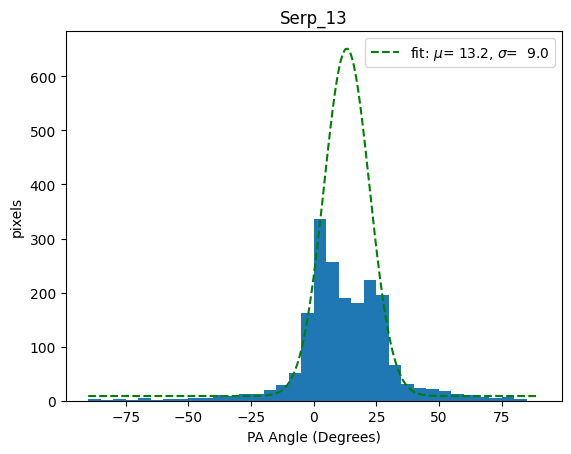

In [13]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUEcompleted
plt.figure()
plt.hist(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[300,10,37,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Serp_13")
plt.savefig("Serp_13_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]
#RED
plt.figure()
plt.hist(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[50,10,37,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Serp_13")
plt.savefig("Serp_13_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

In [14]:
print(C)

[[9.40128857 8.63743248]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]


In [15]:
# Printing blue Gaussian parameters
print("Blue Gaussian Parameters:")
print("Mu (Blue):", Mu[count, 0])
print("Sigma (Blue):", Sig[count, 0])
print("Mu Error (Blue):", Mu_err[count, 0])
print("Sigma Error (Blue):", Sig_err[count, 0])

# Printing red Gaussian parameters
print("\nRed Gaussian Parameters:")
print("Mu (Red):", Mu[count, 1])
print("Sigma (Red):", Sig[count, 1])
print("Mu Error (Red):", Mu_err[count, 1])
print("Sigma Error (Red):", Sig_err[count, 1])


Blue Gaussian Parameters:
Mu (Blue): 8.632883518839003
Sigma (Blue): 10.53439928836136
Mu Error (Blue): 0.20358268392890486
Sigma Error (Blue): 0.3255142334644606

Red Gaussian Parameters:
Mu (Red): 13.208411603347646
Sigma (Red): 9.03165683886022
Mu Error (Red): 0.3502629777002738
Sigma Error (Red): 0.3497384112993485


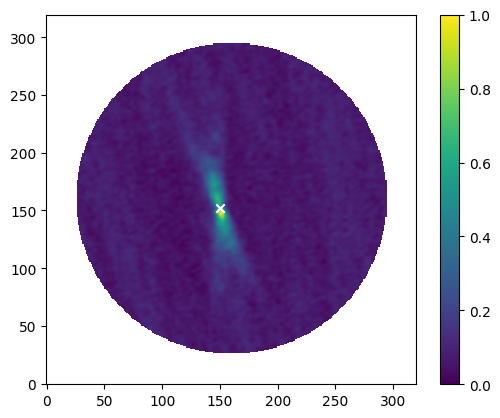

In [16]:
plt.figure()
plt.imshow(image_datar+image_datab,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="white", label="RA/Dec Mark")
plt.colorbar()
plt.show()

#Calculate average mu
mu=(Mu[count, 0]+Mu[count, 1])/2



### Radial Masks

0.0009689922480620155 deg
<SkyCoord (ICRS): (ra, dec) in deg
    (277.287875, 0.52523889)>
Region: CirclePixelRegion
center: PixCoord(x=150.35810344298014, y=151.86428373259224)
radius: 24.91688569814024
(320, 320)
150.35810344298014 151.86428373259224


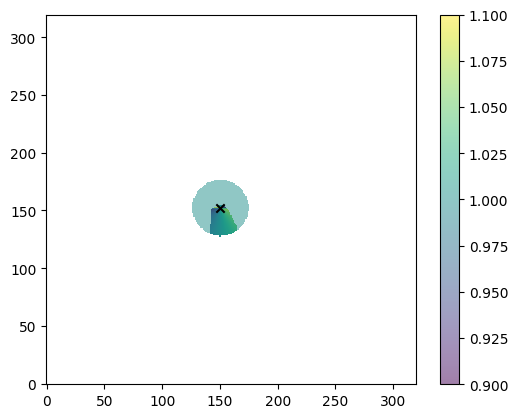

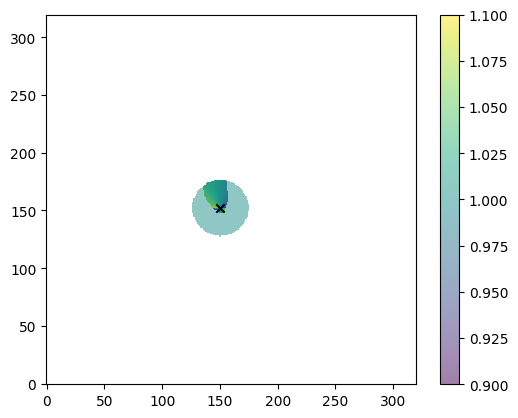

In [38]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

#Define Radius
distance=430.0
radial_cut = (1.5e3*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
print(radial_cut)

B = PA_grid*maskb

from astropy.coordinates import SkyCoord
from astropy import units as u
from regions import PixCoord
from regions import CircleSkyRegion, CirclePixelRegion
from astropy.wcs import WCS

image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

c = SkyCoord('18 29 09.09 0 31 30.86', unit=(u.hourangle, u.deg))
print(c)
#center_sky = SkyCoord(277.34, -1.64, unit='deg', frame='icrs')
region_sky = CircleSkyRegion(center=c, radius=0.00096899 * u.deg)
pix_reg = region_sky.to_pixel(w)
print(pix_reg)
mask_sky=np.ones([image_header_b['NAXIS2'],image_header_b['NAXIS1']])*np.nan

for i in range(image_header_b['NAXIS2']):
    for j in range(image_header_b['NAXIS1']):
        pix=PixCoord(x=j,y=i)
        if pix in pix_reg:
            mask_sky[i][j]=1
    
maskedb=B*mask_sky
#B[250:,:] =np.nan
print(mask_sky.shape)
print(x_source,y_source)
                                                            
plt.imshow(maskedb,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

R = PA_grid*maskr
maskedr=R*mask_sky
#R[:225,:] =np.nan
plt.imshow(maskedr,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

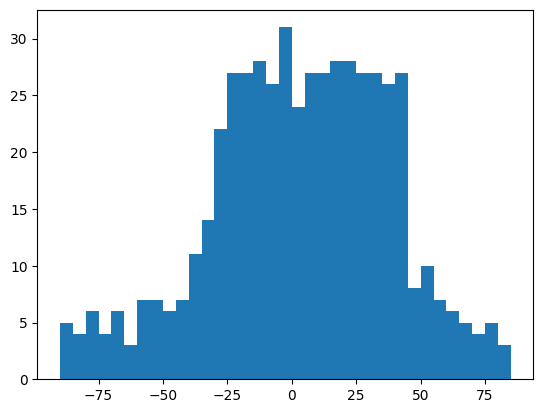

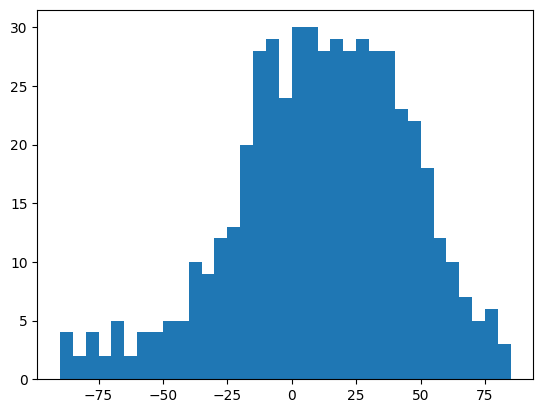

[ 5.  4.  6.  4.  6.  3.  7.  7.  6.  7. 11. 14. 22. 27. 27. 28. 26. 31.
 24. 27. 27. 28. 28. 27. 27. 26. 27.  8. 10.  7.  6.  5.  4.  5.  3.]
[-90. -85. -80. -75. -70. -65. -60. -55. -50. -45. -40. -35. -30. -25.
 -20. -15. -10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.
  50.  55.  60.  65.  70.  75.  80.  85.]
35 36
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]


In [39]:
binrange = np.arange(-90,90,5)
outputb = plt.hist(maskedb.flatten(),bins=binrange)

plt.show()


outputr = plt.hist(maskedr.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)
PA2=np.arange(-90,260,5)#(astropy.coordinates) #— Astropy v5.3.3

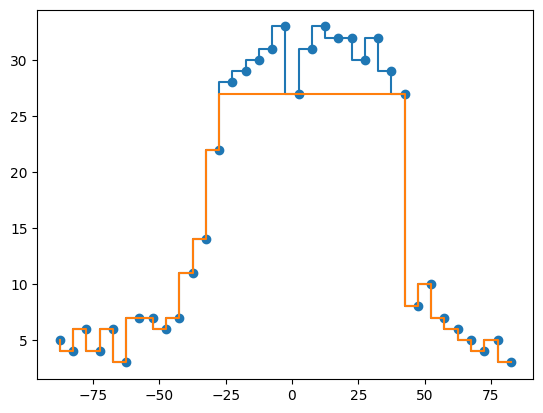

In [26]:
#BLUE

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0],ds='steps')
plt.scatter(PA,outputb[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-2.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subset = np.concatenate((PA[:13], PA[-9:]))
y_subset = np.concatenate((outputb[0][:13], outputb[0][-9:]))
plt.plot(x_subset,y_subset, ds='steps')

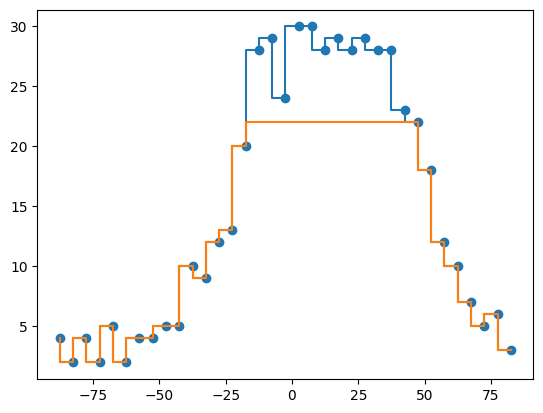

In [42]:
#RED

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputr[0],ds='steps')
plt.scatter(PA,outputr[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-72.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subsetr = np.concatenate((PA[:15], PA[-8:]))
y_subsetr = np.concatenate((outputr[0][:15], outputr[0][-8:]))
plt.plot(x_subsetr,y_subsetr, ds='steps')

Std error [0.41794418 1.36854397]


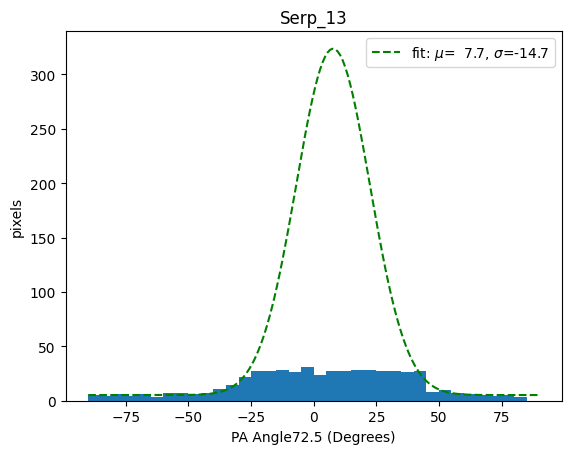

Std error [0.57021684 1.35330038]


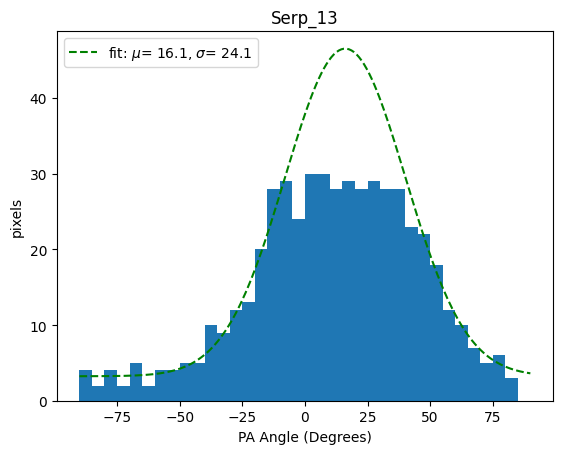

In [44]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUEcompleted
plt.figure()
plt.hist(maskedb.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[300,10,50,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle72.5 (Degrees)")
plt.ylabel("pixels")
plt.title("Serp_13")
plt.savefig("Serp_13_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]
#RED
plt.figure()
plt.hist(maskedr.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[50,10,50,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Serp_13")
plt.savefig("Serp_13_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

0.001937984496124031 deg
<SkyCoord (ICRS): (ra, dec) in deg
    (277.287875, 0.52523889)>
Region: CirclePixelRegion
center: PixCoord(x=150.35810344298014, y=151.86428373259224)
radius: 49.83377139628048
(320, 320)
150.35810344298014 151.86428373259224


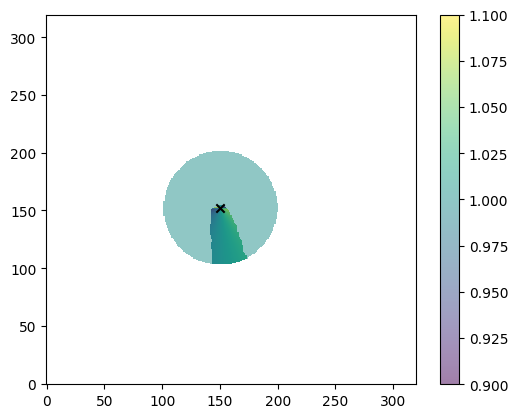

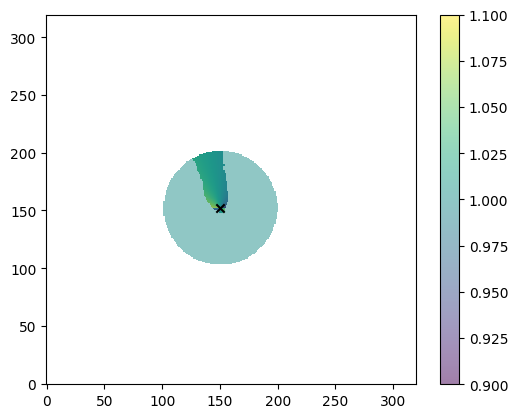

In [45]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

#Define Radius
distance=430.0
radial_cut = (3e3*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
print(radial_cut)

B = PA_grid*maskb

from astropy.coordinates import SkyCoord
from astropy import units as u
from regions import PixCoord
from regions import CircleSkyRegion, CirclePixelRegion
from astropy.wcs import WCS

image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

c = SkyCoord('18 29 09.09 0 31 30.86', unit=(u.hourangle, u.deg))
print(c)
#center_sky = SkyCoord(277.34, -1.64, unit='deg', frame='icrs')
region_sky = CircleSkyRegion(center=c, radius=0.00193798 * u.deg)
pix_reg = region_sky.to_pixel(w)
print(pix_reg)
mask_sky=np.ones([image_header_b['NAXIS2'],image_header_b['NAXIS1']])*np.nan

for i in range(image_header_b['NAXIS2']):
    for j in range(image_header_b['NAXIS1']):
        pix=PixCoord(x=j,y=i)
        if pix in pix_reg:
            mask_sky[i][j]=1
    
maskedb=B*mask_sky
#B[250:,:] =np.nan
print(mask_sky.shape)
print(x_source,y_source)
                                                            
plt.imshow(maskedb,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

R = PA_grid*maskr
maskedr=R*mask_sky
#R[:225,:] =np.nan
plt.imshow(maskedr,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

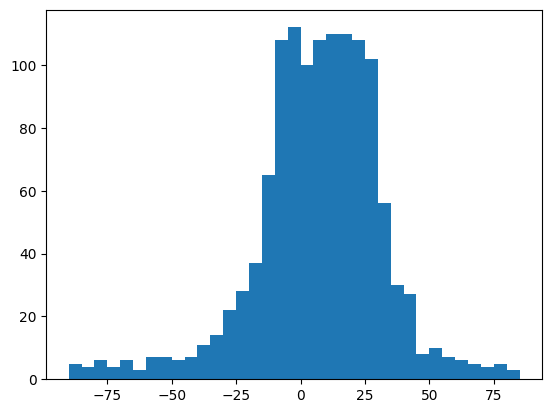

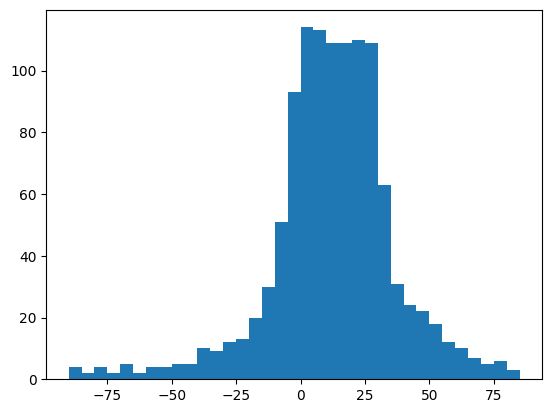

[  5.   4.   6.   4.   6.   3.   7.   7.   6.   7.  11.  14.  22.  28.
  37.  65. 108. 112. 100. 108. 110. 110. 108. 102.  56.  30.  27.   8.
  10.   7.   6.   5.   4.   5.   3.]
[-90. -85. -80. -75. -70. -65. -60. -55. -50. -45. -40. -35. -30. -25.
 -20. -15. -10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.
  50.  55.  60.  65.  70.  75.  80.  85.]
35 36
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]


In [46]:
binrange = np.arange(-90,90,5)
outputb = plt.hist(maskedb.flatten(),bins=binrange)

plt.show()


outputr = plt.hist(maskedr.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)
PA2=np.arange(-90,260,5)#(astropy.coordinates) #— Astropy v5.3.3

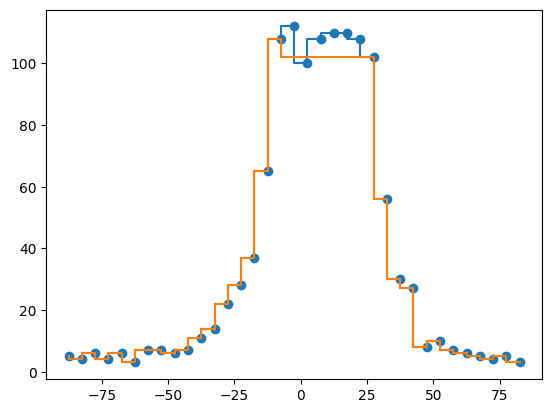

In [56]:
#BLUE

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0],ds='steps')
plt.scatter(PA,outputb[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-2.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subset = np.concatenate((PA[:17], PA[-12:]))
y_subset = np.concatenate((outputb[0][:17], outputb[0][-12:]))
plt.plot(x_subset,y_subset, ds='steps')

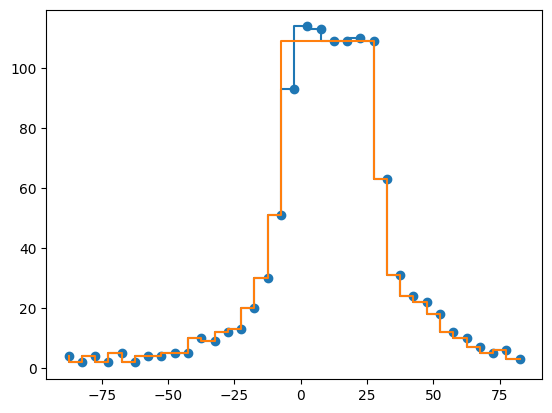

In [57]:
#RED

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputr[0],ds='steps')
plt.scatter(PA,outputr[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-72.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subsetr = np.concatenate((PA[:17], PA[-12:]))
y_subsetr = np.concatenate((outputr[0][:17], outputr[0][-12:]))
plt.plot(x_subsetr,y_subsetr, ds='steps')

Std error [0.22885193 0.42595305]


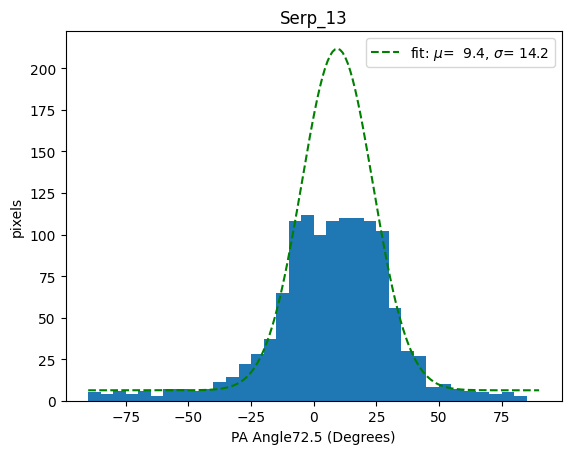

Std error [0.4157132  0.52375675]


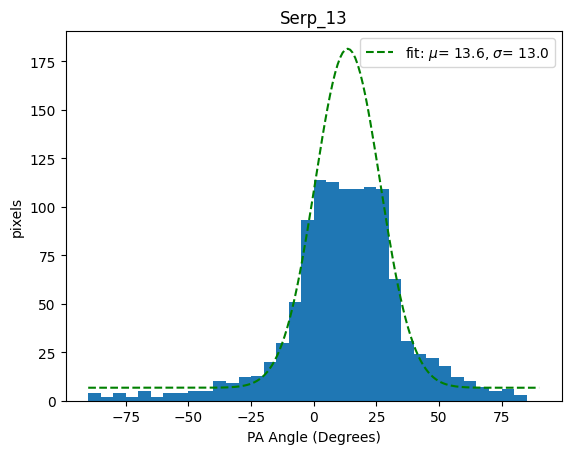

In [58]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUEcompleted
plt.figure()
plt.hist(maskedb.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[300,10,50,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle72.5 (Degrees)")
plt.ylabel("pixels")
plt.title("Serp_13")
plt.savefig("Serp_13_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]
#RED
plt.figure()
plt.hist(maskedr.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[50,10,50,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Serp_13")
plt.savefig("Serp_13_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]